### Load packages

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# EDA for sentiment score data of IPOs

## Load the Dataset

In [3]:
sentiment_data = pd.read_csv('../Datasets/sentimentNewsTechCompanies.csv')

(65189, 17)

In [32]:
#Take a look at the data
sentiment_data.sample(10)

,title,url,time_published,summary,banner_image,source,category_within_source,source_domain,overall_sentiment_score,overall_sentiment_label,numberOfCompanies,companyName,companyRelevanceScore,companySentimentScore,companySentimentLabel,topic,topicRelevanceScore
26031,The Investing Club's top 10 things to watch in...,https://www.cnbc.com/2023/10/16/the-investing-...,20231016T130953,Stocks edge up in premarket trading Monday ahe...,https://image.cnbcfm.com/api/v1/image/10730364...,CNBC,Top News,www.cnbc.com,0.177208,Somewhat-Bullish,14,HUM,0.114956,0.297882,Somewhat-Bullish,Technology,0.250000
33977,This $50 Billion Artificial Intelligence ( AI...,https://www.fool.com/investing/2023/09/13/this...,20230913T220604,Arm Holdings is hoping to ride the acceleratin...,https://g.foolcdn.com/misc-assets/hp-sa-cumula...,Motley Fool,NaN,www.fool.com,0.141014,Neutral,6,NVDA,0.388879,0.247618,Somewhat-Bullish,IPO,0.769861
49647,ESG has lost its meaning. One advocate says le...,https://www.cnn.com/2023/10/03/investing/prema...,20231003T113500,ESG has lost its meaning. One advocate says le...,https://media.cnn.com/api/v1/images/stellar/pr...,CNN,Economy,www.cnn.com,0.091720,Neutral,7,FOX,0.029728,-0.104694,Neutral,Manufacturing,0.333333
61521,Sunoco ( NYSE:SUN ) Downgraded by StockNews....,https://www.defenseworld.net/2023/10/03/sunoco...,20231003T074444,StockNews.com lowered shares of Sunoco ( NYSE:...,https://www.americanbankingnews.com/wp-content...,Stocknews.com,NaN,www.defenseworld.net,0.238227,Somewhat-Bullish,7,BCS,0.057907,-0.014001,Neutral,Financial Markets,1.000000
36614,"Trudge Into Weekend: Firm Dollar, Yields, And ...",https://www.benzinga.com/markets/23/09/3436450...,20230908T151240,( Friday market open ) This short week is star...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,-0.007203,Neutral,12,AAPL,0.175699,-0.048209,Neutral,Manufacturing,0.250000
59548,We're adding to one of our chip stocks in an o...,https://www.cnbc.com/2023/10/03/were-adding-to...,20231003T190017,We picked up more shares of a consumer company...,https://image.cnbcfm.com/api/v1/image/10719703...,CNBC,Top News,www.cnbc.com,0.258909,Somewhat-Bullish,4,AVGO,0.756417,0.412105,Bullish,Financial Markets,0.818451
36312,"Oil Climbs, iPhone Faces China Ban, UAW Strike...",https://www.benzinga.com/markets/equities/23/0...,20230908T201541,"The week began with a surge in oil prices, as ...",https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,0.046653,Neutral,14,MPC,0.117774,0.220103,Somewhat-Bullish,Energy & Transportation,0.200000
16048,Can Markets Resume Northward Journey in Septem...,https://www.zacks.com/stock/news/2144765/can-m...,20230905T131600,We have narrowed our search to five growth sto...,https://staticx-tuner.zacks.com/images/article...,Zacks Commentary,NaN,www.zacks.com,0.240917,Somewhat-Bullish,6,RCL,0.145804,0.273788,Somewhat-Bullish,Technology,0.250000
20315,3 Top Stocks To Buy if There Is a Market Pullback,https://www.fool.com/investing/2023/08/20/3-to...,20230820T170000,These companies proved their reliance after la...,https://g.foolcdn.com/misc-assets/hp-sa-cumula...,Motley Fool,NaN,www.fool.com,0.230081,Somewhat-Bullish,6,AAPL,0.211191,0.012276,Neutral,Technology,0.500000
54412,This fund manager had a rough quarter but is s...,https://www.marketwatch.com/story/from-the-mgm...,20231020T120500,One fund manager just went through a bruising ...,https://images.mktw.net/im-872414?width=700&he...,MarketWatch,Top Stories,www.marketwatch.com,0.026690,Neutral,9,VSAT,0.127908,-0.094868,Neutral,Finance,0.333333


Sentiment Score definition:

x <= -0.35          : Bearish

-0.35 < x <= -0.15  : Somewhat-Bearish

-0.15 < x < 0.15    : Neutral

0.15 <= x < 0.35    : Somewhat_Bullish

x >= 0.35           : Bullish'

## Data cleaning

### Dropping unnecessary columns
Since we are only interested in 'overall_sentiment_label' and, 'companyName' columns we will get rid of the rest of the columns

In [5]:
# Drop all columns except 'overall_sentiment_label' and 'companyName'
sentimentdata_subset = sentiment_data[['overall_sentiment_label', 'companyName']]
# Take a look at the new dataset
sentimentdata_subset.sample(10)

,overall_sentiment_label,companyName
427,Neutral,V
38806,Somewhat-Bullish,CSGP
25244,Neutral,MSFT
38900,Bullish,V
48480,Somewhat-Bullish,MSFT
26133,Neutral,NFLX
7100,Neutral,CSCO
12162,Somewhat-Bullish,MDNDF
16738,Somewhat-Bullish,NIO
23608,Somewhat-Bullish,KLAC


#### Check for null values

In [ ]:
has_nulls = sentimentdata_subset.isnull().any().any()

if has_nulls:
    print("The dataset contains null values.")
else:
    print("The dataset does not have any null values.")

The dataset does not have any null values.


#### Check for NaN values

In [ ]:
# Check for NaN values in all columns
has_nan_values = sentimentdata_subset.isna().any()

# Print columns with NaN values
columns_with_nan = has_nan_values[has_nan_values].index.tolist()
print("Columns with NaN values:", columns_with_nan)

# Alternatively, you can check if any column has NaN values in the entire DataFrame
if has_nan_values.any():
    print("The DataFrame contains NaN values in at least one column.")
else:
    print("The DataFrame does not have any NaN values.")


Columns with NaN values: []
The DataFrame does not have any NaN values.


#### Standardizing Text Data

In [26]:
sentimentdata_subset.loc[:,'overall_sentiment_label'] = sentimentdata_subset['overall_sentiment_label'].str.upper()
sentimentdata_subset.loc[:,'companyName'] = sentimentdata_subset['companyName'].str.upper()
sentimentdata_subset.sample(10)


,overall_sentiment_label,companyName
25467,SOMEWHAT-BULLISH,AAPL
16802,SOMEWHAT-BULLISH,AMZN
42764,SOMEWHAT-BULLISH,MSFT
28534,BULLISH,NVDA
45900,NEUTRAL,MSFT
25332,SOMEWHAT-BULLISH,MSFT
22404,SOMEWHAT-BULLISH,AMZN
11877,SOMEWHAT-BULLISH,AAPL
44643,BULLISH,MSFT
43127,NEUTRAL,MSFT


#### Data integrity
Check if all columns overall contain the categories of interest 

In [27]:
unique_sentimentlables = sentimentdata_subset['overall_sentiment_label'].unique()
unique_companynames = sentimentdata_subset['companyName'].unique()
print(unique_sentimentlables, unique_companynames)
sentimentdata_subset['companyName'].describe()

['NEUTRAL' 'SOMEWHAT-BULLISH' 'BULLISH' 'SOMEWHAT-BEARISH' 'BEARISH'] ['MSFT' 'AMZN' 'NVDA' 'AAPL']


count     15982
unique        4
top        NVDA
freq       4743
Name: companyName, dtype: object

Filter the data based on companies of our interest: 

In [28]:
interested_companies = ['AMZN', 'AAPL', 'MSFT', 'NVDA']
sentimentdata_subset = sentimentdata_subset[sentimentdata_subset['companyName'].isin(interested_companies)]

#show dataset summary
print(sentimentdata_subset['companyName'].describe(), sentimentdata_subset['companyName'].unique())


count     15982
unique        4
top        NVDA
freq       4743
Name: companyName, dtype: object ['MSFT' 'AMZN' 'NVDA' 'AAPL']


#### one-hot encoding

In [29]:
# List of sentiment labels for one-hot encoding
sentiment_labels = ['NEUTRAL', 'SOMEWHAT-BULLISH', 'BULLISH', 'SOMEWHAT-BEARISH', 'BEARISH']
# Perform one-hot encoding for 'overall_sentiment_label' using the specified labels
sentimentdata_encoded = pd.get_dummies(sentimentdata_subset, columns=['overall_sentiment_label'], prefix='', prefix_sep='').reindex(columns= sentiment_labels , fill_value=0)

# Print the encoded DataFrame
sentimentdata_encoded.describe()


,NEUTRAL,SOMEWHAT-BULLISH,BULLISH,SOMEWHAT-BEARISH,BEARISH
count,15982.000000,15982.000000,15982.000000,15982.000000,15982.000000
mean,0.362095,0.575522,0.057565,0.004442,0.000375
std,0.480621,0.494279,0.232926,0.066506,0.019373
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Summary

### Shape of the data

In [14]:
#Understanding the shape of the DataFrame
print("Number of Rows:", sentimentdata_subset.shape[0])
print("Number of Columns:", sentimentdata_subset.shape[1])

Number of Rows: 15982
Number of Columns: 2


### Data types of each column

In [16]:
sentimentdata_subset.dtypes

overall_sentiment_label    object
companyName                object
dtype: object

### Summary Statistics

In [17]:
sentimentdata_subset['overall_sentiment_label'].value_counts()
sentimentdata_subset['companyName'].value_counts()

NVDA    4743
MSFT    4230
AMZN    3511
AAPL    3498
Name: companyName, dtype: int64

## Data visualization

### Barplot

Text(0, 0.5, 'Count')

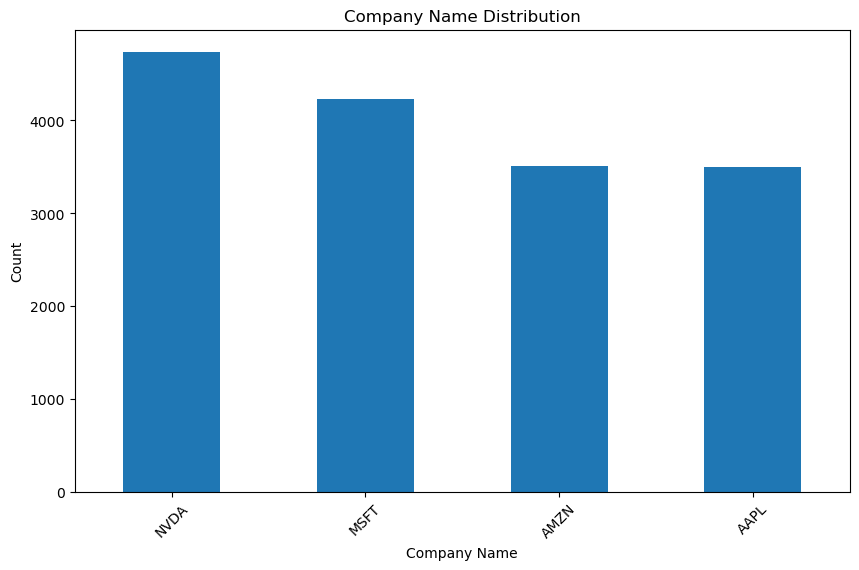

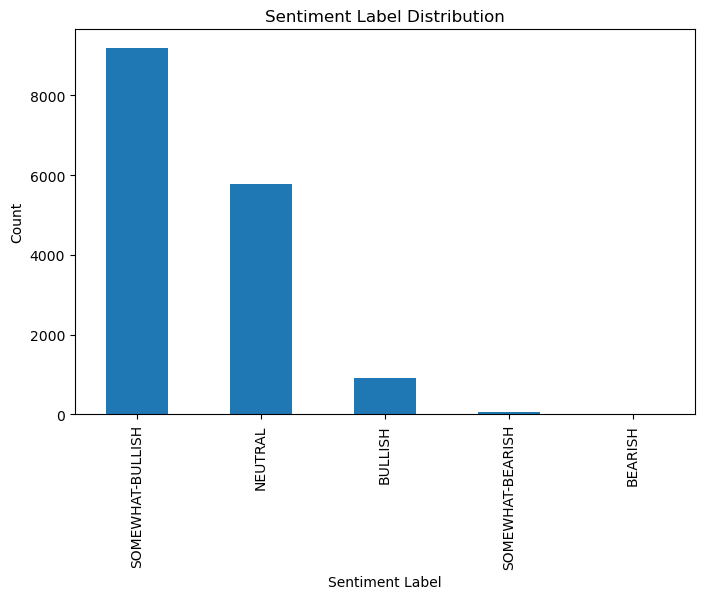

In [31]:
# Bar plot for 'companyName'
plt.figure(figsize=(10, 6))
sentimentdata_subset['companyName'].value_counts().plot(kind='bar')
plt.title('Company Name Distribution')
plt.xlabel('Company Name')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Bar plot for 'overall_sentiment_label'
plt.figure(figsize=(8, 5))
sentimentdata_subset['overall_sentiment_label'].value_counts().plot(kind='bar')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')



### Pie Chart

Text(0, 0.5, '')

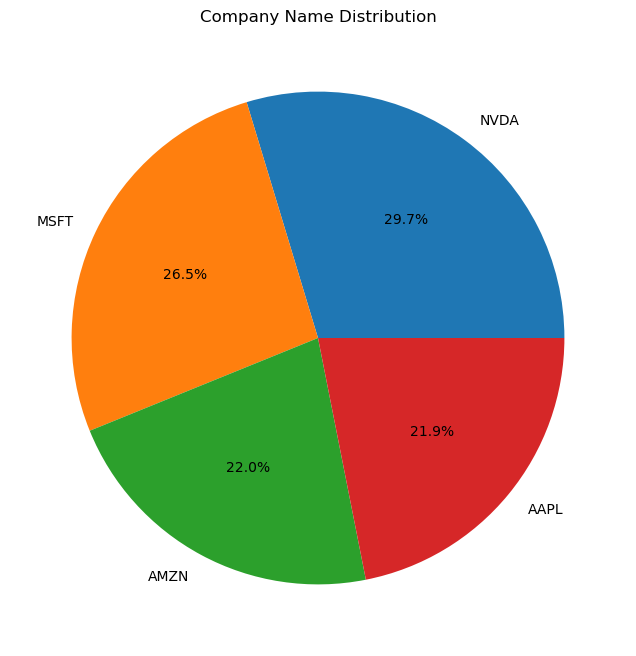

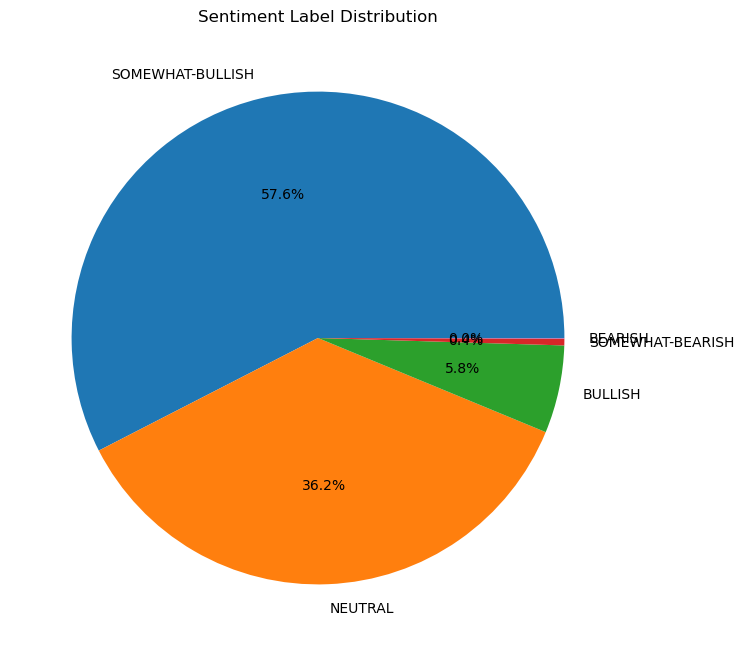

In [33]:
# Pie chart for 'companyName'
plt.figure(figsize=(8, 8))
sentimentdata_subset['companyName'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Company Name Distribution')
plt.ylabel('')


# Pie chart for 'overall_sentiment_label'
plt.figure(figsize=(8, 8))
sentimentdata_subset['overall_sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Label Distribution')
plt.ylabel('')



### Heatmap

Text(120.72222222222221, 0.5, 'Company Name')

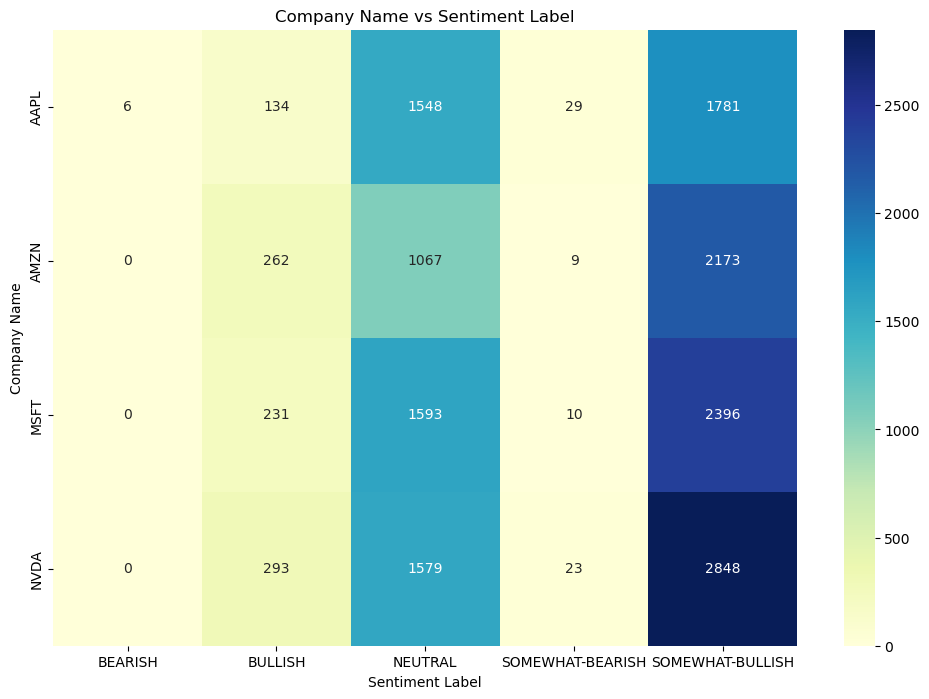

In [34]:
# Create a contingency table for 'companyName' vs 'overall_sentiment_label'
contingency_table = pd.crosstab(sentimentdata_subset['companyName'], sentimentdata_subset['overall_sentiment_label'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Company Name vs Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Company Name')



# EDA for Dailyprice data of IPOs

## Load the dataset

In [87]:
filepath = '../Datasets/DailyPricesTechCompanies.csv'
dailyprice = pd.read_csv(filepath)

In [88]:
#Take a look at the data
dailyprice.sample(10)

,date,1. open,2. high,3. low,4. close,5. volume,TickerName
22543,2001-04-27,69.53,69.68,66.21,67.12,60786200,MSFT
19322,2014-02-19,37.22,37.75,37.21,37.51,29750400,MSFT
23765,2020-06-10,366.71,380.00,366.14,374.67,15804537,NVDA
2028,2015-09-29,506.00,511.48,490.50,496.07,4457532,AMZN
3368,2010-06-03,126.25,129.15,124.85,128.76,5276900,AMZN
7909,2016-05-04,706.77,715.05,704.05,711.37,1708609,GOOGL
9860,2008-08-04,468.80,473.01,461.90,463.00,4969000,GOOGL
9740,2009-01-26,324.85,328.00,320.56,323.87,9212100,GOOGL
20816,2008-03-13,28.54,28.99,28.16,28.62,84552200,MSFT
19392,2013-11-06,37.24,38.22,37.06,38.18,88948800,MSFT


## Data cleaning

### Rename columns

In [89]:
dailyprice.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume',
    'date': 'Date'
}, inplace=True)


### Data type conversion

In [90]:
# Convert 'date' column to datetime
dailyprice['Date'] = pd.to_datetime(dailyprice['Date'])

In [91]:
# Convert numerical columns to numeric types
numeric_cols = ['Open', 'High', 'Low', 'Close','Volume']
dailyprice[numeric_cols] = dailyprice[numeric_cols].apply(pd.to_numeric)

#use the code bellow if you get an error in the preceding cell
#apple_stock = apple_stock.drop(columns=['level_0', 'index'])    

#### Check for null values

In [92]:
has_nulls = dailyprice.isnull().any().any()

if has_nulls:
    print("The dataset contains null values.")
else:
    print("The dataset does not have any null values.")

The dataset does not have any null values.


In [93]:
# Convert numerical columns to numeric types
numeric_cols = ['Open', 'High', 'Low', 'Close','Volume']
dailyprice[numeric_cols] = dailyprice[numeric_cols].apply(pd.to_numeric)

#use the code bellow if you get an error in the preceding cell
#apple_stock = apple_stock.drop(columns=['level_0', 'index'])  
 

### Dropping unnecessary columns
Since we are only interested in closing_price, volume and tickername columns, we will get rid of the rest of the columns.

In [94]:
# Drop all columns except 'overall_sentiment_label' and 'companyName'
dailyprice = dailyprice[['Close', 'Volume','TickerName']]
# Take a look at the new dataset
dailyprice.sample(10)

,Close,Volume,TickerName
17880,145.960,16752939,MSFT
23018,401.110,92340110,NVDA
14414,165.298,16751000,AAPL
10359,376.940,8613300,GOOGL
8532,1010.590,2222900,GOOGL
26277,12.220,21476700,NVDA
13857,388.830,15386100,AAPL
8989,632.910,5517800,GOOGL
13137,100.110,49766312,AAPL
1826,739.950,2216820,AMZN


#### Check for NaN values

In [95]:
# Check for NaN values in all columns
has_nan_values = dailyprice.isna().any()

# Print columns with NaN values
columns_with_nan = has_nan_values[has_nan_values].index.tolist()
print("Columns with NaN values:", columns_with_nan)

# Alternatively, you can check if any column has NaN values in the entire DataFrame
if has_nan_values.any():
    print("The DataFrame contains NaN values in at least one column.")
else:
    print("The DataFrame does not have any NaN values.")


Columns with NaN values: []
The DataFrame does not have any NaN values.


## Data Summary

### Shape of the data

In [96]:
#Understanding the shape of the DataFrame
print("Number of Rows:", dailyprice.shape[0])
print("Number of Columns:", dailyprice.shape[1])

Number of Rows: 28950
Number of Columns: 3


### Data types of each column

In [97]:
dailyprice.dtypes

Close         float64
Volume          int64
TickerName     object
dtype: object

### Summary Statistics

In [98]:
dailyprice.describe()

,Close,Volume
count,28950.000000,2.895000e+04
mean,336.508259,2.272443e+07
std,585.638687,2.597560e+07
min,5.900000,3.845900e+04
25%,32.018750,5.083751e+06
50%,113.010000,1.239845e+07
75%,352.057500,3.192339e+07
max,3731.410000,5.910522e+08


In [99]:
dailyprice['TickerName'].value_counts()

AMZN     6031
AAPL     6031
MSFT     6031
NVDA     6031
GOOGL    4826
Name: TickerName, dtype: int64

## Data visualization

### Histograms

Text(0, 0.5, 'Frequency')

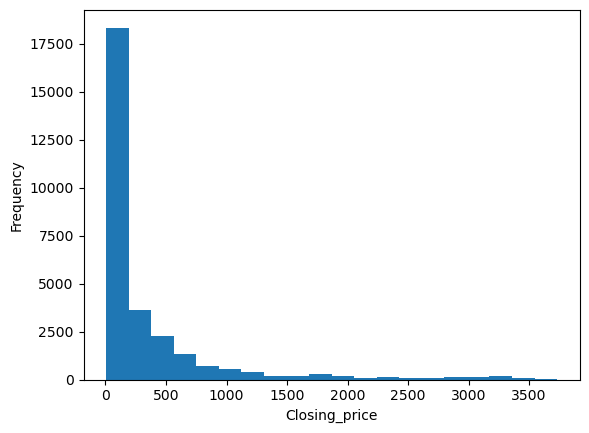

In [100]:
dailyprice['Close'].plot(kind='hist', bins=20)
plt.xlabel('Closing_price')
plt.ylabel('Frequency')

### Correlation Matrix

In [102]:
correlation_matrix = dailyprice.corr()
correlation_matrix


,Close,Volume
Close,1.000000,-0.283795
Volume,-0.283795,1.000000


### Box Plots
Detect outliers in numerical columns.

Text(0, 0.5, 'Numerical Columns')

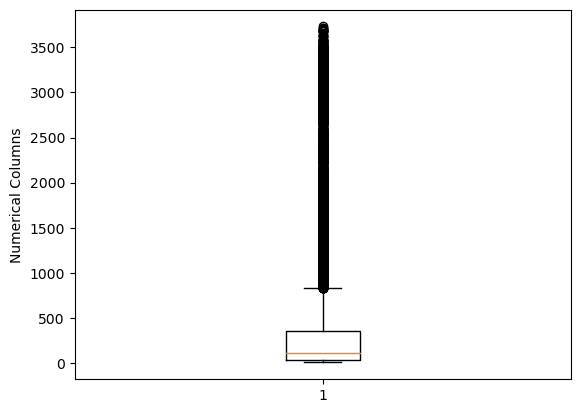

In [104]:
# closing price
plt.boxplot(dailyprice['Close'])
plt.ylabel('Closing price count')


Text(0, 0.5, 'Volume count')

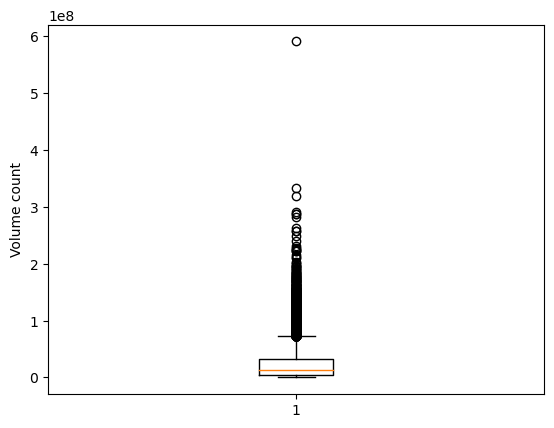

In [105]:
# closing price
plt.boxplot(dailyprice['Volume'])
plt.ylabel('Volume count')

### pairplot

c:\Users\babyl\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


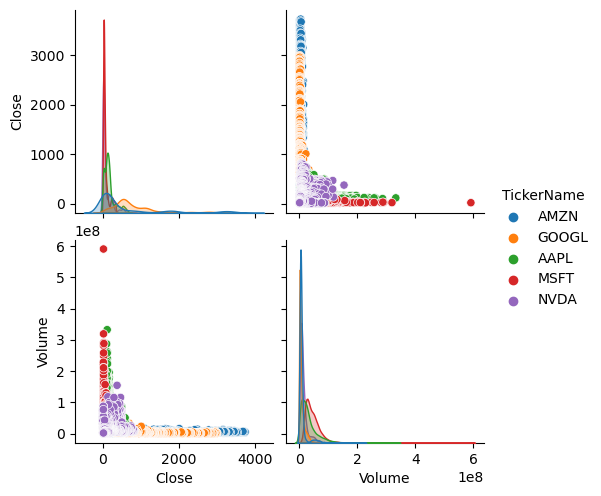

In [101]:
sns.pairplot(dailyprice, hue='TickerName', height=2.5)

### Normalization

In [80]:
# # Create a MinMaxScaler object
scaler = MinMaxScaler()

# # Normalize the 'Close' and 'Volume' columns
dailyprice[['Close', 'Volume']] =  scaler.fit_transform(dailyprice[['Close', 'Volume']])
dailyprice